In [1]:
!pip install --pre -U tensorflow
import math
import tensorflow as tf

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.3 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.3 which is incompatible.
google-cloud-storage 1.31.0 requires google-auth<2.0dev,>=1.11.0, but you have google-auth 2.18.0 which is incompatible.
google-cloud-core 1.7.1 requires google-auth<2.0dev,>=1.24.0, but you have google-auth 2.18.0 which is incompatible.
google-api-core 1.25.1 requires google-auth<2.0dev,>=1.21.1, but you have google-auth 2.18.0 which is incompatible.

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ------------------------------------- 276.5/276.5 MB 10.6 MB/s eta 0:00:00
     --------------------------------------- 14.9/14.9 MB 50.4 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 44.5 MB/s eta 0:00:00
     ------------------------------------- 440.8/440.8 kB 28.7 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 36.0 MB/s eta 0:00:00
     ------------------------------------- 422.5/422.5 kB 25.8 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 29.8 MB/s eta 0:00:00
     ------------------------------------- 178.9/178.9 kB 11.2 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.1.4
    Uninstalling flatbuffers-23.1.4:
      Successfully uninstalled flatbuffers-23.1.4
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tenso

C:\Users\phi49\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 비정형 텐서

중첩된 가변 길이 목록에 해당하는 TensorFlow로, 균일하지 않은 형상을 가진 데이터를 쉽게 저장하고 처리할 수 있음

- 영화의 출연 배우진과 같은 가변 길이 요소
- 문자 또는 비디오 클립과 같은 가변 길이 순차 입력의 배치
- 여러 섹션, 단락, 문장 및 단어로 세분화된 텍스트 문서와 같은 계층화된 입력
- 프로토콜 버퍼와 같은 구조화된 입력의 개별 필드

### 비정형 텐서로 할 수 있는 작업

1. 연산

- 수학 연산(`tf.add`, `tf.reduce_mean`)
- 배열 연산(`tf.concat`, `tf,tile`)
- 문자열 조작 연산(`tf.substr`)
- 제어 흐름 연산(`tf.while_loop`, `tf.map_fn`)

이외 백 가지 이상의 연산

In [2]:
# 비정형 텐서 선언 (행렬, 문자열)
digits = tf.ragged.constant([[3, 1, 4, 1], [], [5, 9, 2], [6], []])
words = tf.ragged.constant([["So", "long"], ["thanks", "for", "all", "the", "fish"]])

print(tf.add(digits, 3))  # 덧셈 연산
print(tf.reduce_mean(digits, axis=1))  # 행 단위 평균 (axis = 1)
print(tf.concat([digits, [[5, 3]]], axis=0))  # 가장 바깥 쪽에 있는 차원을 기준으로 붙임
print(tf.tile(digits, [1, 2]))  # 원본 데이터를 복사
print(tf.strings.substr(words, 0, 2))  # 0~2까지 요소만 잘라서 사용
print(tf.map_fn(tf.math.square, digits))  # tf.math.square을 사용해 제곱하여 표현

<tf.RaggedTensor [[6, 4, 7, 4], [], [8, 12, 5], [9], []]>
tf.Tensor([2.25              nan 5.33333333 6.                nan], shape=(5,), dtype=float64)
<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9, 2], [6], [], [5, 3]]>
<tf.RaggedTensor [[3, 1, 4, 1, 3, 1, 4, 1], [], [5, 9, 2, 5, 9, 2], [6, 6], []]>
<tf.RaggedTensor [[b'So', b'lo'], [b'th', b'fo', b'al', b'th', b'fi']]>
<tf.RaggedTensor [[9, 1, 16, 1], [], [25, 81, 4], [36], []]>


2. 비정형 텐서만 지원하는 여러 메서드와 연산 : `tf.ragged`

3. 일반 텐서와 마찬가지로, 인덱싱도 사용 가능

In [3]:
print(digits[0])       # 첫 번째 열

tf.Tensor([3 1 4 1], shape=(4,), dtype=int32)


In [4]:
print(digits[:, :2])   # 해당 열의 앞에서 2개의 요소

<tf.RaggedTensor [[3, 1], [], [5, 9], [6], []]>


In [5]:
print(digits[:, -2:])  # 해당 열의 뒤에서 2개의 요소

<tf.RaggedTensor [[4, 1], [], [9, 2], [6], []]>


4. Python 산술 및 비교 연산자 사용

In [7]:
print(digits + 3)

<tf.RaggedTensor [[6, 4, 7, 4], [], [8, 12, 5], [9], []]>


In [8]:
print(digits + tf.ragged.constant([[1, 2, 3, 4], [], [5, 6, 7], [8], []]))

<tf.RaggedTensor [[4, 3, 7, 5], [], [10, 15, 9], [14], []]>


5. RaggedTensor 값으로 요서별 변환 수행 해, tf.ragged.map_float_values 사용 가능

In [9]:
times_two_plus_one = lambda x: x * 2 + 1
print(tf.ragged.map_flat_values(times_two_plus_one, digits))

<tf.RaggedTensor [[7, 3, 9, 3], [], [11, 19, 5], [13], []]>


6. 비정형 텐서는 중첩된 Python list와 NumPy array로 변환 가능

In [10]:
digits.to_list()

[[3, 1, 4, 1], [], [5, 9, 2], [6], []]

In [11]:
digits.numpy()

array([array([3, 1, 4, 1]), array([], dtype=int32), array([5, 9, 2]),
       array([6]), array([], dtype=int32)], dtype=object)

### 비정형 텐서 생성

* 방법 1 : Python list 또는 NumPy array에 해당하는 RaggedTensor를 빌드하는 `tf.ragged.constant`사용

In [12]:
sentences = tf.ragged.constant([
    ["Let's", "build", "some", "ragged", "tensors", "!"],
    ["We", "can", "use", "tf.ragged.constant", "."]])
print(sentences)

<tf.RaggedTensor [[b"Let's", b'build', b'some', b'ragged', b'tensors', b'!'],
 [b'We', b'can', b'use', b'tf.ragged.constant', b'.']]>


In [13]:
paragraphs = tf.ragged.constant([
    [['I', 'have', 'a', 'cat'], ['His', 'name', 'is', 'Mat']],
    [['Do', 'you', 'want', 'to', 'come', 'visit'], ["I'm", 'free', 'tomorrow']],
])
print(paragraphs)

<tf.RaggedTensor [[[b'I', b'have', b'a', b'cat'], [b'His', b'name', b'is', b'Mat']],
 [[b'Do', b'you', b'want', b'to', b'come', b'visit'],
  [b"I'm", b'free', b'tomorrow']]]>


* 방법 2 : 팩토리 클래스 메서드 `tf.RaggedTensor`를 사용하여 플랫 values 텐서와 행 분할 텐서를 쌍을 지어 해당 값을 행으로 분할하는 방법을 표시하는 방식으로도 생성 가능

`tf.RaggedTensor.from_value_rowids`

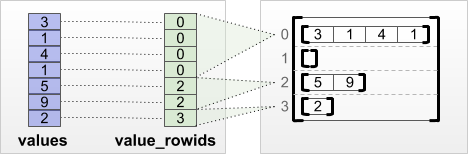

각 값이 어느 행에 속하는지 알고 싶을 때 value_roids 행 분할 텐서를 사용하여 RaggedTensor를 빌드 가능

In [15]:
print(tf.RaggedTensor.from_value_rowids(
    values=[3, 1, 4, 1, 5, 9, 2],
    value_rowids=[0, 0, 0, 0, 2, 2, 3]))

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9], [2]]>


`tf.RaggedTensor.from_row_lengths`

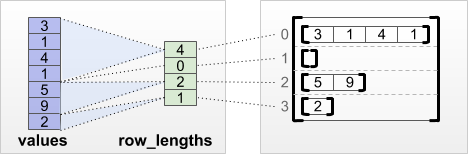

각 행의 길이를 알고 있으면 row_lengths 행 분할 텐서 사용 가능

In [16]:
print(tf.RaggedTensor.from_row_lengths(
    values=[3, 1, 4, 1, 5, 9, 2],
    row_lengths=[4, 0, 2, 1]))

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9], [2]]>


`tf.RaggedTensor.from_row_splits`

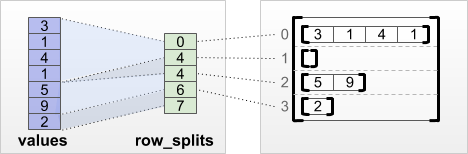

각 행ㅇ의 시작과 끝 인덱스를 알고 있다면 row_splits 행 분할 텐서 사용 가능

In [17]:
print(tf.RaggedTensor.from_row_splits(
    values=[3, 1, 4, 1, 5, 9, 2],
    row_splits=[0, 4, 4, 6, 7]))

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9], [2]]>


### 비정형 텐서에 저장할 수 있는 것

일반 텐서와 마찬가지로, `RaggedTensor`의 값은 모두 같은 유형이어야 함 (값은 모두 동일한 중첩 길이)

In [18]:
print(tf.ragged.constant([["Hi"], ["How", "are", "you"]]))  # ok: type=string, rank=2

<tf.RaggedTensor [[b'Hi'], [b'How', b'are', b'you']]>


In [19]:
print(tf.ragged.constant([[[1, 2], [3]], [[4, 5]]]))        # ok: type=int32, rank=3

<tf.RaggedTensor [[[1, 2], [3]], [[4, 5]]]>


In [20]:
try:
    tf.ragged.constant([["one", "two"], [3, 4]])             # bad: multiple types
except ValueError as exception:
    print(exception)

Can't convert Python sequence with mixed types to Tensor.


In [21]:
try:
    tf.ragged.constant(["A", ["B", "C"]])                    # bad: multiple nesting depths
except ValueError as exception:
    print(exception)

all scalar values must have the same nesting depth


## 사용 사례

예제 : 각 문장의 시작과 끝에 특수 마커를 사용해 가변 길이 쿼리 배치에 대해 유니그램과 바이그램 임베딩을 구성하고 결합하는 데에 RaggedTensor를 어떻게 사용할 수 있는지 보여줌

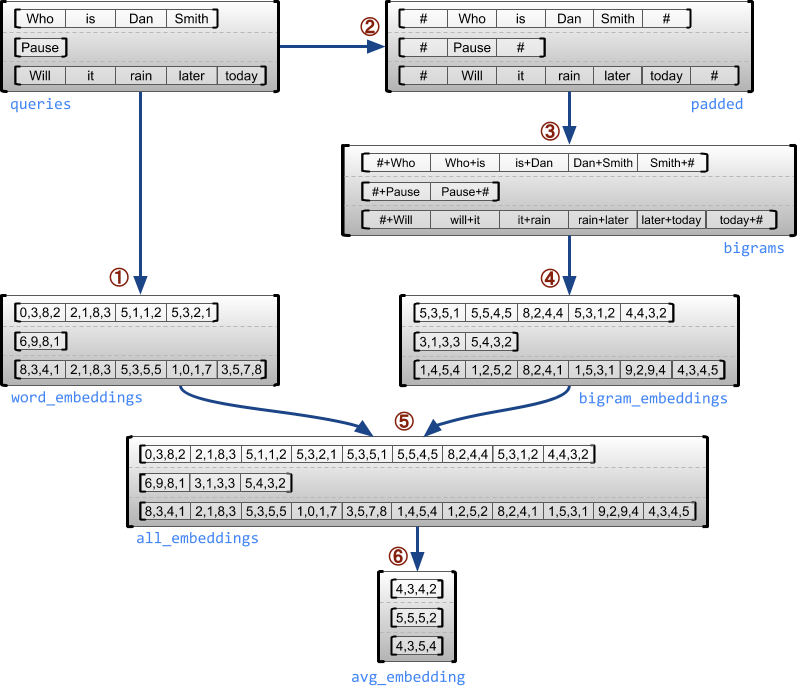

In [22]:
# 비정형 쿼리 생성
queries = tf.ragged.constant([['Who', 'is', 'Dan', 'Smith'],
                              ['Pause'],
                              ['Will', 'it', 'rain', 'later', 'today']])

# Create an embedding table
# 1024개 중 단어 하나당 4개의 요소로 구성
num_buckets = 1024
embedding_size = 4
embedding_table = tf.Variable(
    tf.random.truncated_normal([num_buckets, embedding_size],
                       stddev=1.0 / math.sqrt(embedding_size)))

# Look up the embedding for each word.
word_buckets = tf.strings.to_hash_bucket_fast(queries, num_buckets)
word_embeddings = tf.nn.embedding_lookup(embedding_table, word_buckets)     # ①

# Add markers to the beginning and end of each sentence. (단어별 패딩 추가)
marker = tf.fill([queries.nrows(), 1], '#')
padded = tf.concat([marker, queries, marker], axis=1)                       # ②

# Build word bigrams and look up embeddings.
# N-gram : 문자열에서 n개의 연속적인 단어, 나열을 의미
#          가지고 있는 코퍼스에서 n개의 단어 뭉치 단위로 끊어서 이를 하나의 토큰으로 간주
#          n이 1이면 유니그램, 2면 바이그램, 3이면 트라이그램, 4이상은 숫자 붙여 명명
bigrams = tf.strings.join([padded[:, :-1], padded[:, 1:]], separator='+')   # ③

bigram_buckets = tf.strings.to_hash_bucket_fast(bigrams, num_buckets)
bigram_embeddings = tf.nn.embedding_lookup(embedding_table, bigram_buckets) # ④

# Find the average embedding for each sentence
all_embeddings = tf.concat([word_embeddings, bigram_embeddings], axis=1)    # ⑤
avg_embedding = tf.reduce_mean(all_embeddings, axis=1)                      # ⑥ 행 단위 평균
print(avg_embedding)

tf.Tensor(
[[-0.3090258   0.03275607 -0.1451799  -0.18651381]
 [ 0.19063734  0.17153375  0.22805636  0.02911028]
 [ 0.02165536  0.04470104 -0.1314291   0.04438745]], shape=(3, 4), dtype=float32)


## 비정형 텐서 : 정의

비정형 텐서 : 슬라이스의 길이가 다를 수 있는 하나 이상의 비정형 크기를 갖는 텐서


1. 내부 크기 안의 길이가 다른 것이 비정형, 부분의 길이가 모두 같은 차원은 정형 차원


2. 비정형 텐서의 가장 바깥쪽 차원은 단일 슬라이스로 구성되므로 항상 균일 (나머지 치수는 불규칙하거나 균일할 수 있음)


3. 비정형 텐서는 여러 개의 비정형 차원을 가질 수 있음


4. 비정형 텐서의 순위 : 전체 차원의 수 (비정형 차원과 균일한 차원 모두 포함)
    - 잠재적 비정형 텐서는 `tf.Tensor`또는 `tf.RaggedTensor`일 수 있는 값
    
    
5. RaggedTensor의 형상을 설명할 때, 비정형 차원은 일반적으로 괄호로 묶어 표시


6. RaggedTensor.shape 특성은 비정형 차원의 크기가 None인 비정형 텐서에 대해 tf.TensorShape 반환

In [23]:
tf.ragged.constant([["Hi"], ["How", "are", "you"]]).shape

TensorShape([2, None])

7. tf.RaggedTensor.bounding_shape 메서드를 사용하여 지정된 RaggedTensor에 대한 빈틈이 없는 경계 형태를 찾을 수 있음

In [24]:
print(tf.ragged.constant([["Hi"], ["How", "are", "you"]]).bounding_shape())

tf.Tensor([2 3], shape=(2,), dtype=int64)


## 비정형 대 희소

*비정형 텐서는 희소 텐서의 일종으로 생각하지 않아야 함*

*희소 텐서는 `tf.Tensor`에 대해 효율적인 인코딩이고, 비정형 텐서는 `tf.Tensor`의 확장임*

- 항상 동일한 결과가 얻어지거나, 아예 다른 결과가 얻어질 수 있음

1. 비정형 텐서의 연결
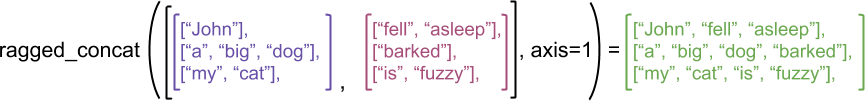


2. 희소 텐서의 연결
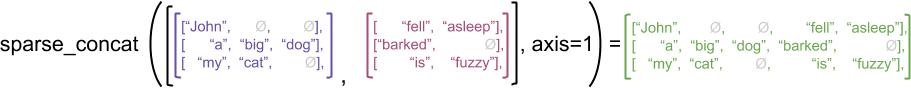

## TensorFlow API

### Keras

`tf.keras` : 딥 러닝 모델을 구축하고 훈련하기 위한 TensorFlow 고급 API

- `tf.keras.Input` 또는 `tf.keras.layers.InputLayer`에서 ragged=True를 설정하여 비정형 텐서를 Keras 모델에 대한 입력으로 전달 가능
- 비정형 텐서는 Keras 계층 간에 전달되고, Keras 모델에서 반환될 수도 있음

In [25]:
### 비정형 텐서를 사용하여 훈련된 장난감 LSTM 모델을 보여줌

# Task: predict whether each sentence is a question or not.
sentences = tf.constant(
    ['What makes you think she is a witch?',
     'She turned me into a newt.',
     'A newt?',
     'Well, I got better.'])
is_question = tf.constant([True, False, True, False])

# Preprocess the input strings.
hash_buckets = 1000
words = tf.strings.split(sentences, ' ')
hashed_words = tf.strings.to_hash_bucket_fast(words, hash_buckets)

# Build the Keras model.
keras_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[None], dtype=tf.int64, ragged=True),
    tf.keras.layers.Embedding(hash_buckets, 16),
    tf.keras.layers.LSTM(32, use_bias=False),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Activation(tf.nn.relu),
    tf.keras.layers.Dense(1)
])

keras_model.compile(loss='binary_crossentropy', optimizer='rmsprop')
keras_model.fit(hashed_words, is_question, epochs=5)
print(keras_model.predict(hashed_words))

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 7.7141
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 7.7125
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 7.7125
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 7.7125
Epoch 5/5
1/1 [==============================] - 0s 226ms/step
[[-0.01072649]
 [-0.00810313]
 [-0.00843824]
 [-0.00864883]]


### tf.Example

`tf.Example` : TensorFlow 데이터에 대한 표준 protobuf 인코딩

- 인코딩된 데이터에는 종종 가변 길이 특성이 포함

In [26]:
import google.protobuf.text_format as pbtext

### 특성 길이가 상이한 네 개의 tf.Example 메시지 배치를 정의
def build_tf_example(s):
    return pbtext.Merge(s, tf.train.Example()).SerializeToString()

example_batch = [
  build_tf_example(r'''
    features {
      feature {key: "colors" value {bytes_list {value: ["red", "blue"]} } }
      feature {key: "lengths" value {int64_list {value: [7]} } } }'''),
  build_tf_example(r'''
    features {
      feature {key: "colors" value {bytes_list {value: ["orange"]} } }
      feature {key: "lengths" value {int64_list {value: []} } } }'''),
  build_tf_example(r'''
    features {
      feature {key: "colors" value {bytes_list {value: ["black", "yellow"]} } }
      feature {key: "lengths" value {int64_list {value: [1, 3]} } } }'''),
  build_tf_example(r'''
    features {
      feature {key: "colors" value {bytes_list {value: ["green"]} } }
      feature {key: "lengths" value {int64_list {value: [3, 5, 2]} } } }''')]

`tf.io.parse_example` : 직렬화된 문자열 텐서와 특성 사양 사전을 받아서 특성 이름을 탠서에 매핑하는 사전을 반환 -> 인코딩된 데이터를 구문 분석할 수 있음

`tf.io.RaggedFeature` : 가변 길이 특성을 비정형 텐서로 읽을 때 사용하고, 비정형 차원이 여러 개인 특성을 읽는 데에도 사용 가능 

In [27]:
feature_specification = {
    'colors': tf.io.RaggedFeature(tf.string),
    'lengths': tf.io.RaggedFeature(tf.int64),
}
feature_tensors = tf.io.parse_example(example_batch, feature_specification)
for name, value in feature_tensors.items():
    print("{}={}".format(name, value))

colors=<tf.RaggedTensor [[b'red', b'blue'], [b'orange'], [b'black', b'yellow'], [b'green']]>
lengths=<tf.RaggedTensor [[7], [], [1, 3], [3, 5, 2]]>


### 데이터세트

`tf.data`

- 간단하고 재사용 가능한 부분으로 복잡한 입력 파이프라인을 구출할 수 있는 API
- 핵심 데이터 구조는 `tf.data.Dataset`, 각 요소가 하나 이상의 구성 요소로 이루어진 일련의 요소를 나타냄

In [28]:
# 아래 예시들의 데이터 셋을 출력해주는 함수
def print_dictionary_dataset(dataset):
    for i, element in enumerate(dataset):
        print("Element {}:".format(i))
        for (feature_name, feature_value) in element.items():
              print('{:>14} = {}'.format(feature_name, feature_value))

**비정형 텐서로 데이터세트 빌드하기**

`tf.Tensor` 또는 `Dataset.from_tensor_slices` 사용

In [29]:
dataset = tf.data.Dataset.from_tensor_slices(feature_tensors)
print_dictionary_dataset(dataset)

Element 0:
        colors = [b'red' b'blue']
       lengths = [7]
Element 1:
        colors = [b'orange']
       lengths = []
Element 2:
        colors = [b'black' b'yellow']
       lengths = [1 3]
Element 3:
        colors = [b'green']
       lengths = [3 5 2]


**비정형 텐서를 사용한 데이터세트 일괄 처리 및 일괄 해제**

`Dataset.batch` : 비정형 텐서가 있는 데이터세트를 일괄 처리 가능 (n개의 연속된 연속된 요소를 단일 요소로 결합)

`Dataset.unbatch` : 일괄 처리된 데이터세트를 보통의 데이터세트로 변환 가능

In [30]:
batched_dataset = dataset.batch(2)
print_dictionary_dataset(batched_dataset)

Element 0:
        colors = <tf.RaggedTensor [[b'red', b'blue'], [b'orange']]>
       lengths = <tf.RaggedTensor [[7], []]>
Element 1:
        colors = <tf.RaggedTensor [[b'black', b'yellow'], [b'green']]>
       lengths = <tf.RaggedTensor [[1, 3], [3, 5, 2]]>


In [31]:
unbatched_dataset = batched_dataset.unbatch()
print_dictionary_dataset(unbatched_dataset)

Element 0:
        colors = [b'red' b'blue']
       lengths = [7]
Element 1:
        colors = [b'orange']
       lengths = []
Element 2:
        colors = [b'black' b'yellow']
       lengths = [1 3]
Element 3:
        colors = [b'green']
       lengths = [3 5 2]


**비정형이 아닌 가변 길이 텐서를 사용하여 데이터세트 일괄 처리**

`dense_to_ragged_batch` : 비정형이 아닌 텐서를 포함하는 데이터세트가 있고, 텐서 길이가 요소마다 다른 경우에 비정형 텐서로 일괄 처리 가능

In [32]:
non_ragged_dataset = tf.data.Dataset.from_tensor_slices([1, 5, 3, 2, 8])
non_ragged_dataset = non_ragged_dataset.map(tf.range)
batched_non_ragged_dataset = non_ragged_dataset.apply(
    tf.data.experimental.dense_to_ragged_batch(2))
for element in batched_non_ragged_dataset:
    print(element)

Instructions for updating:
Use `tf.data.Dataset.ragged_batch` instead.
<tf.RaggedTensor [[0], [0, 1, 2, 3, 4]]>
<tf.RaggedTensor [[0, 1, 2], [0, 1]]>
<tf.RaggedTensor [[0, 1, 2, 3, 4, 5, 6, 7]]>


**비정형 텐서를 사용하여 데이터세트 변환**

`Dataset.map`을 사용하여 데이터세트에서 비정형 텐서를 생성하거나 변환할 수 있음

In [34]:
def transform_lengths(features):
    return {
        'mean_length': tf.math.reduce_mean(features['lengths']),
        'length_ranges': tf.ragged.range(features['lengths'])}

transformed_dataset = dataset.map(transform_lengths)
print_dictionary_dataset(transformed_dataset)

Element 0:
   mean_length = 7
 length_ranges = <tf.RaggedTensor [[0, 1, 2, 3, 4, 5, 6]]>
Element 1:
   mean_length = 0
 length_ranges = <tf.RaggedTensor []>
Element 2:
   mean_length = 2
 length_ranges = <tf.RaggedTensor [[0], [0, 1, 2]]>
Element 3:
   mean_length = 3
 length_ranges = <tf.RaggedTensor [[0, 1, 2], [0, 1, 2, 3, 4], [0, 1]]>


### tf.function

`@tf.function` : 데코레이트된 함수로 비정형 텐서를 투명하게 사용 가능, 비정형 / 비정형이 아닌 텐서 모두 작동

`tf.function` : Python 함수용 TensorFlow 그래프를 미리 계산하는 데코레이터, 성능 향상 가능

`tf.RaggedTensorSpec` : tf.function에 대한 input_signature 명시적 지정

In [35]:
@tf.function
def make_palindrome(x, axis):
    return tf.concat([x, tf.reverse(x, [axis])], axis)

In [36]:
make_palindrome(tf.constant([[1, 2], [3, 4], [5, 6]]), axis=1)

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[1, 2, 2, 1],
       [3, 4, 4, 3],
       [5, 6, 6, 5]])>

In [37]:
make_palindrome(tf.ragged.constant([[1, 2], [3], [4, 5, 6]]), axis=1)

<tf.RaggedTensor [[1, 2, 2, 1], [3, 3], [4, 5, 6, 6, 5, 4]]>

In [38]:
@tf.function(
    # input_signature 명시적 지정
    input_signature=[tf.RaggedTensorSpec(shape=[None, None], dtype=tf.int32)])
def max_and_min(rt):
    return (tf.math.reduce_max(rt, axis=-1), tf.math.reduce_min(rt, axis=-1))

max_and_min(tf.ragged.constant([[1, 2], [3], [4, 5, 6]]))

(<tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 3, 6])>,
 <tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 3, 4])>)

**구체적인 함수**

구체적인 함수는 `tf.function`에 의해 빌드된 개별 추적 그래프를 캡슐화 하므로, 투명하게 사용 가능

In [39]:
@tf.function
def increment(x):
    return x + 1

rt = tf.ragged.constant([[1, 2], [3], [4, 5, 6]])
cf = increment.get_concrete_function(rt)
print(cf(rt))

<tf.RaggedTensor [[2, 3], [4], [5, 6, 7]]>


### SavedModel

가중치와 계산을 모두 포함하는 직렬화된 TensorFlow 프로그램으로, Keras 모델 또는 사용자 지정 모델로부터 빌드 가능

**예: Keras 모델 저장**

In [40]:
import tempfile

keras_module_path = tempfile.mkdtemp()
tf.saved_model.save(keras_model, keras_module_path)
imported_model = tf.saved_model.load(keras_module_path)
imported_model(hashed_words)

INFO:tensorflow:Assets written to: C:\Users\phi49\AppData\Local\Temp\tmpz_moq28k\assets


INFO:tensorflow:Assets written to: C:\Users\phi49\AppData\Local\Temp\tmpz_moq28k\assets


<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[-0.0107265 ],
       [-0.00810313],
       [-0.00843824],
       [-0.00864883]], dtype=float32)>

**사용자 지정 모델 저장**

In [41]:
class CustomModule(tf.Module):
    def __init__(self, variable_value):
        super(CustomModule, self).__init__()
        self.v = tf.Variable(variable_value)

    @tf.function
    def grow(self, x):
        return x * self.v

module = CustomModule(100.0)

# 사용자 지정 모델을 저장하기 전, 필요로 하는 input signature 각각에 대해 기능들이 구현 필요
module.grow.get_concrete_function(tf.RaggedTensorSpec(shape=[None, None],
                                                      dtype=tf.float32))

custom_module_path = tempfile.mkdtemp()
tf.saved_model.save(module, custom_module_path)
imported_model = tf.saved_model.load(custom_module_path)
imported_model.grow(tf.ragged.constant([[1.0, 4.0, 3.0], [2.0]]))

INFO:tensorflow:Assets written to: C:\Users\phi49\AppData\Local\Temp\tmpar_vlwnx\assets


INFO:tensorflow:Assets written to: C:\Users\phi49\AppData\Local\Temp\tmpar_vlwnx\assets


<tf.RaggedTensor [[100.0, 400.0, 300.0], [200.0]]>

## 오버로드된 연산자

`RaggedTensor` : 표준 Python 산술 및 비교 연산자를 오버로드하여 기본 요소 별 수학 쉽게 수행 가능

In [42]:
x = tf.ragged.constant([[1, 2], [3], [4, 5, 6]])
y = tf.ragged.constant([[1, 1], [2], [3, 3, 3]])
print(x + y)

<tf.RaggedTensor [[2, 3], [5], [7, 8, 9]]>


* 오버로드된 연산자 : 요소별 계산을 수행하므로, 모든 이진 연산에 대한 입력은 동일한 형상을 갖거나 동일한 형상으로 브로드캐스트 할 수 있어야 함


* 가장 단순한 브로드캐스팅의 경우, 단일 스칼라가 비정형 텐서의 각 값과 요소별로 결합됨


* 비정형 텐서는 일반 텐서와 동일한 연산자 세트를 오버로드 함 : 단항 연산자 -, ~ 및 abs(); 그리고 이항 연산자 +, -, *, /, //, %, **, &, |, ^, ==, <, <=, > 및 >=.

In [43]:
x = tf.ragged.constant([[1, 2], [3], [4, 5, 6]])
print(x + 3)

<tf.RaggedTensor [[4, 5], [6], [7, 8, 9]]>


## 인덱싱

다차원 인덱싱 및 슬라이싱을 포함하여 Python 스타일의 인덱싱을 지원

### 인덱싱 예제: 2D 비정형 텐서

In [44]:
queries = tf.ragged.constant(
    [['Who', 'is', 'George', 'Washington'],
     ['What', 'is', 'the', 'weather', 'tomorrow'],
     ['Goodnight']])

In [45]:
print(queries[1])                   # A single query

tf.Tensor([b'What' b'is' b'the' b'weather' b'tomorrow'], shape=(5,), dtype=string)


In [46]:
print(queries[1, 2])                # A single word

tf.Tensor(b'the', shape=(), dtype=string)


In [47]:
print(queries[1:])                  # Everything but the first row

<tf.RaggedTensor [[b'What', b'is', b'the', b'weather', b'tomorrow'], [b'Goodnight']]>


In [48]:
print(queries[:, :3])               # The first 3 words of each query

<tf.RaggedTensor [[b'Who', b'is', b'George'], [b'What', b'is', b'the'], [b'Goodnight']]>


In [49]:
print(queries[:, -2:])              # The last 2 words of each query

<tf.RaggedTensor [[b'George', b'Washington'], [b'weather', b'tomorrow'], [b'Goodnight']]>


### 인덱싱 예제: 3D 비정형 텐서

In [50]:
rt = tf.ragged.constant([[[1, 2, 3], [4]],
                         [[5], [], [6]],
                         [[7]],
                         [[8, 9], [10]]])

In [51]:
print(rt[1])                        # Second row (2D RaggedTensor)

<tf.RaggedTensor [[5], [], [6]]>


In [52]:
print(rt[3, 0])                     # First element of fourth row (1D Tensor)

tf.Tensor([8 9], shape=(2,), dtype=int32)


In [53]:
print(rt[:, 1:3])                   # Items 1-3 of each row (3D RaggedTensor)

<tf.RaggedTensor [[[4]], [[], [6]], [], [[10]]]>


In [54]:
print(rt[:, -1:])                   # Last item of each row (3D RaggedTensor)

<tf.RaggedTensor [[[4]],

 [[6]],

 [[7]],

 [[10]]]>


* 주의: `RaggedTensor`는 다차원 인덱싱 및 슬라이싱은 지원하지만 비정형 차원으로의 인덱싱은 허용안됨

## 텐서 형 변환

`RaggedTensor` 클래스 : RaggedTensor와 tf.Tensor 또는 tf.SparseTensors 사이를 변환하는데 사용하는 메서드를 정의

In [55]:
ragged_sentences = tf.ragged.constant([
    ['Hi'], ['Welcome', 'to', 'the', 'fair'], ['Have', 'fun']])

In [56]:
# RaggedTensor -> Tensor
print(ragged_sentences.to_tensor(default_value='', shape=[None, 10]))

tf.Tensor(
[[b'Hi' b'' b'' b'' b'' b'' b'' b'' b'' b'']
 [b'Welcome' b'to' b'the' b'fair' b'' b'' b'' b'' b'' b'']
 [b'Have' b'fun' b'' b'' b'' b'' b'' b'' b'' b'']], shape=(3, 10), dtype=string)


In [57]:
# Tensor -> RaggedTensor
x = [[1, 3, -1, -1], [2, -1, -1, -1], [4, 5, 8, 9]]
print(tf.RaggedTensor.from_tensor(x, padding=-1))

<tf.RaggedTensor [[1, 3], [2], [4, 5, 8, 9]]>


In [58]:
#RaggedTensor (비정형 텐서) -> SparseTensor (희소 텐서)
print(ragged_sentences.to_sparse())

SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 0]
 [1 1]
 [1 2]
 [1 3]
 [2 0]
 [2 1]], shape=(7, 2), dtype=int64), values=tf.Tensor([b'Hi' b'Welcome' b'to' b'the' b'fair' b'Have' b'fun'], shape=(7,), dtype=string), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [59]:
# SparseTensor -> RaggedTensor
st = tf.SparseTensor(indices=[[0, 0], [2, 0], [2, 1]],
                     values=['a', 'b', 'c'],
                     dense_shape=[3, 3])
print(tf.RaggedTensor.from_sparse(st))

<tf.RaggedTensor [[b'a'], [], [b'b', b'c']]>


## 비정형 텐서 평가

즉시 실행 모드에서는, 비정형 텐서가 즉시 실행


1. `tf.RaggedTensor.to_list`를 사용하여 비정형 텐서를 중첩된 Python 목록으로 변환


2. `tf.RaggedTensor.numpy`를 사용하여 비정형 텐서를 값이 중첩된 NumPy 배열인 NumPy 배열로 변환


3. `tf.RaggedTensor.values` 및 `tf.RaggedTensor.row_splits` 속성, 또는 `tf.RaggedTensor.row_lengths` 및 `tf.RaggedTensor.value_rowids`와 같은 행-분할 메서드를 사용하여 비정형 텐서를 해당 구성 요소로 분해


4. Python 인덱싱을 사용하여 비정형 텐서에서 값을 선택

In [61]:
rt = tf.ragged.constant([[1, 2], [3, 4, 5], [6], [], [7]])

print("Python list:", rt.to_list())
print("NumPy array:", rt.numpy())
print("Values:", rt.values.numpy())
print("Splits:", rt.row_splits.numpy())
print("Indexed value:", rt[1].numpy())

Python list: [[1, 2], [3, 4, 5], [6], [], [7]]
NumPy array: [array([1, 2]) array([3, 4, 5]) array([6]) array([], dtype=int32)
 array([7])]
Values: [1 2 3 4 5 6 7]
Splits: [0 2 5 6 6 7]
Indexed value: [3 4 5]


## 비정형 형상

텐서의 형상 : 각 축의 크기를 지정


- *정적 형상* : 정적인 것으로 알려진 축 크기에 대한 정보
- *동적 형상* : 축 크기에 대한 런타임 정보

### 정적 형상

- 텐서의 정적 형상에는 그래프 구성 시점에 알려진 축 크기에 대한 정보가 포함되어 있음
- `tf.Tensor`와 `tf.RaggedTensor` 모두 `.shape` 속성을 사용하여 사용가능, `tf.TensorShape`를 사용하여 인코딩됨
- 비정형 차원의 정적 형상은 항상 None(지정되지 않음)

In [62]:
x = tf.constant([[1, 2], [3, 4], [5, 6]])
x.shape  # shape of a tf.tensor

TensorShape([3, 2])

In [63]:
rt = tf.ragged.constant([[1], [2, 3], [], [4]])
rt.shape  # shape of a tf.RaggedTensor

TensorShape([4, None])

### 동적 형상

그래프가 실행될 때 알려진 축 크기에 대한 정보를 포함 (`tf.shape`를 사용하여 구성)

`tf.shape`

- 형상을 1D 정수 Tensor로 반환, tf.shape(x)[i ]는 i 축의 크기
- 1차원 텐서는 비정형 텐서의 형상을 설명하기에 충분하지 않으므로, `tf.experimental.DynamicRaggedShape`을 사용하여 인코딩

In [64]:
x = tf.constant([['a', 'b'], ['c', 'd'], ['e', 'f']])
tf.shape(x)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 2])>

In [65]:
rt = tf.ragged.constant([[1], [2, 3, 4], [], [5, 6]])
rt_shape = tf.shape(rt)  # 길이가 1, 3, 0, 2인 4개의 행이 있음을 나타냄
print(rt_shape)

<DynamicRaggedShape lengths=[4, (1, 3, 0, 2)] num_row_partitions=1>


#### 1. 동적 형상 : 연산

`DynamicRaggedShape` : `tf.reshape`, `tf.zeros`, `tf.ones`, `tf.fill`, `tf.broadcast_dynamic_shape`, `tf.broadcast_to` 등 형상을 예상하는 대부분의 TensorFlow 연산에 사용

In [67]:
print(f"tf.reshape(x, rt_shape) = {tf.reshape(x, rt_shape)}")
print(f"tf.zeros(rt_shape) = {tf.zeros(rt_shape)}")
print(f"tf.ones(rt_shape) = {tf.ones(rt_shape)}")
print(f"tf.fill(rt_shape, 9) = {tf.fill(rt_shape, 'x')}")

tf.reshape(x, rt_shape) = <tf.RaggedTensor [[b'a'], [b'b', b'c', b'd'], [], [b'e', b'f']]>
tf.zeros(rt_shape) = <tf.RaggedTensor [[0.0], [0.0, 0.0, 0.0], [], [0.0, 0.0]]>
tf.ones(rt_shape) = <tf.RaggedTensor [[1.0], [1.0, 1.0, 1.0], [], [1.0, 1.0]]>
tf.fill(rt_shape, 9) = <tf.RaggedTensor [[b'x'], [b'x', b'x', b'x'], [], [b'x', b'x']]>


#### 2. 동적 형상 : 인덱싱 및 슬라이싱

`DynamicRaggedShape` : 균일한 차원 크기로 인덱싱할 수 있음

- But, 단일 크기를 갖지 않으므로 비정형 차원의 크기를 검색하기 위해 인덱싱을 사용할 경우 오류 발생

- 슬라이스가 축 0으로 시작하거나 밀집 차원만 포함하는 경우도 슬라이싱 가능

In [68]:
rt_shape[0]

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [69]:
try:
    rt_shape[1]
except ValueError as e:
    print("Got expected ValueError:", e)

Got expected ValueError: Index 1 is not uniform


In [70]:
rt_shape[:1]

<DynamicRaggedShape lengths=[4] num_row_partitions=0>

#### 3. 동적 형상 : 인코딩

두 필드를 사용하여 인코딩

- `inner_shape`: 밀집 tf.Tensor의 형상을 제공하는 정수 벡터
- `row_partitions`: 비정형 축을 추가하기 위해 내부 형상의 가장 바깥쪽 차원을 분할하는 방법을 설명하는 tf.experimental.RowPartition 객체 목록

#### 4. 동적 형상 : 구성

`DynamicRaggedShape` : tf.shape를 비정형 텐서에 적용할 수도 있지만 직접 구성도 가능

- 모든 행의 길이를 정적으로 알고 있는 경우, `DynamicRaggedShape.from_lengths`를 사용하여 동적 비정형 형상을 구성할 수도 있음

In [72]:
tf.experimental.DynamicRaggedShape(
    row_partitions=[tf.experimental.RowPartition.from_row_lengths([5, 3, 2])],
    inner_shape=[10, 8])

<DynamicRaggedShape lengths=[3, (5, 3, 2), 8] num_row_partitions=1>

In [73]:
tf.experimental.DynamicRaggedShape.from_lengths([4, (2, 1, 0, 8), 12])

<DynamicRaggedShape lengths=[4, (2, 1, 0, 8), 12] num_row_partitions=1>

### Broadcasting

* 브로드캐스팅: 여러 형상의 텐서를 요소별 연산에 대해 호환 가능한 형상으로 만드는 프로세스


* x와 y를 브로드캐스팅하는 기본 단계

1. x 와 y 의 차원 수가 동일하지 않은 경우, 외부 차원 (크기 1)을 차원 수가 동일해질 때까지 추가합니다 .

2. x 와 y 의 크기가 다른 각 차원에 대해: x 또는 y가 차원 d에서 1의 크기를 갖는 경우, 다른 입력 크기와 일치하도록 차원 d에 걸쳐 값을 반복 / 그렇지 않으면 예외를 발생(x 및 y는 브로드캐스트 호환되지 않음).

In [74]:
# x       (2D ragged):  2 x (num_rows)
# y       (scalar)
# result  (2D ragged):  2 x (num_rows)
x = tf.ragged.constant([[1, 2], [3]])
y = 3
print(x + y)

<tf.RaggedTensor [[4, 5], [6]]>


In [75]:
# x         (2d ragged):  3 x (num_rows)
# y         (2d tensor):  3 x          1
# Result    (2d ragged):  3 x (num_rows)
x = tf.ragged.constant(
   [[10, 87, 12],
    [19, 53],
    [12, 32]])
y = [[1000], [2000], [3000]]
print(x + y)

<tf.RaggedTensor [[1010, 1087, 1012], [2019, 2053], [3012, 3032]]>


In [76]:
# x      (3d ragged):  2 x (r1) x 2
# y      (2d ragged):         1 x 1
# Result (3d ragged):  2 x (r1) x 2
x = tf.ragged.constant(
    [[[1, 2], [3, 4], [5, 6]],
     [[7, 8]]],
    ragged_rank=1)
y = tf.constant([[10]])
print(x + y)

<tf.RaggedTensor [[[11, 12],
  [13, 14],
  [15, 16]], [[17, 18]]]>


In [77]:
# x      (3d ragged):  2 x (r1) x (r2) x 1
# y      (1d tensor):                    3
# Result (3d ragged):  2 x (r1) x (r2) x 3
x = tf.ragged.constant(
    [
        [
            [[1], [2]],
            [],
            [[3]],
            [[4]],
        ],
        [
            [[5], [6]],
            [[7]]
        ]
    ],
    ragged_rank=2)
y = tf.constant([10, 20, 30])
print(x + y)

<tf.RaggedTensor [[[[11, 21, 31],
   [12, 22, 32]], [], [[13, 23, 33]], [[14, 24, 34]]],
 [[[15, 25, 35],
   [16, 26, 36]], [[17, 27, 37]]]]>


브로드캐스트 하지 않는 형태의 예

In [78]:
# x      (2d ragged): 3 x (r1)
# y      (2d tensor): 3 x    4  # trailing dimensions do not match
x = tf.ragged.constant([[1, 2], [3, 4, 5, 6], [7]])
y = tf.constant([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
try:
    x + y
except tf.errors.InvalidArgumentError as exception:
    print(exception)

Condition x == y did not hold.
Indices of first 3 different values:
[[1]
 [2]
 [3]]
Corresponding x values:
[ 4  8 12]
Corresponding y values:
[2 6 7]
First 3 elements of x:
[0 4 8]
First 3 elements of y:
[0 2 6]


In [79]:
# x      (2d ragged): 3 x (r1)
# y      (2d ragged): 3 x (r2)  # ragged dimensions do not match.
x = tf.ragged.constant([[1, 2, 3], [4], [5, 6]])
y = tf.ragged.constant([[10, 20], [30, 40], [50]])
try:
    x + y
except tf.errors.InvalidArgumentError as exception:
    print(exception)

Condition x == y did not hold.
Indices of first 2 different values:
[[1]
 [3]]
Corresponding x values:
[3 6]
Corresponding y values:
[2 5]
First 3 elements of x:
[0 3 4]
First 3 elements of y:
[0 2 4]


In [80]:
# x      (3d ragged): 3 x (r1) x 2
# y      (3d ragged): 3 x (r1) x 3  # trailing dimensions do not match
x = tf.ragged.constant([[[1, 2], [3, 4], [5, 6]],
                        [[7, 8], [9, 10]]])
y = tf.ragged.constant([[[1, 2, 0], [3, 4, 0], [5, 6, 0]],
                        [[7, 8, 0], [9, 10, 0]]])
try:
    x + y
except tf.errors.InvalidArgumentError as exception:
    print(exception)

Condition x == y did not hold.
Indices of first 3 different values:
[[1]
 [2]
 [3]]
Corresponding x values:
[2 4 6]
Corresponding y values:
[3 6 9]
First 3 elements of x:
[0 2 4]
First 3 elements of y:
[0 3 6]


## RaggedTensor 인코딩

비정형 텐서는 `RaggedTensor` 클래스를 사용하여 인코딩

- 가변 길이 행을 평면화된 목록으로 연결하는 `values` 텐서
- 평면화된 값이 행으로 분할되는 방식을 나타내는 `row_partition`

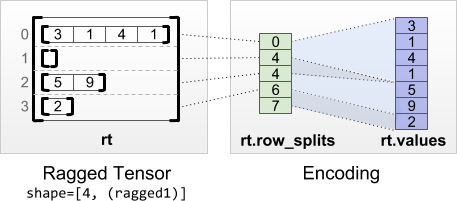

`row_partition`은 네 가지 인코딩을 사용하여 저장 가능

- `row_splits`는 행 사이의 분할 지점을 지정하는 정수 벡터
- `value_rowids`는 각 값에 대한 행 인덱스를 지정하는 정수 벡터
- `row_lengths`는 각 행의 길이를 지정하는 정수 벡터
- `uniform_row_length`는 모든 행에 대해 단일 길이를 지정하는 정수 스칼라

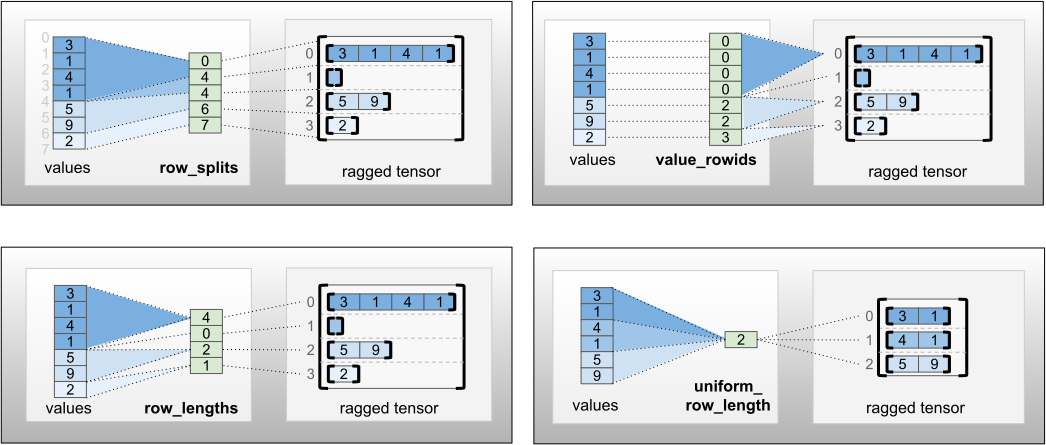

정수 스칼라 nrows는 value_rowids가 있는 빈 후행 행 또는 uniform_row_length가 있는 빈 행을 고려하기 위해 row_partition에 포함될 수도 있음

In [81]:
rt = tf.RaggedTensor.from_row_splits(
    values=[3, 1, 4, 1, 5, 9, 2],
    row_splits=[0, 4, 4, 6, 7])
print(rt)

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9], [2]]>


다양한 행 분할 방식의 일부 장점과 단점


1. 효율적인 인덱싱 : row_splits 인코딩은 일정 시간 인덱싱 및 비정형 텐서로의 슬라이싱을 가능하게 함


2. 효율적인 연결 : 두 개의 텐서가 함께 연결될 때 행 길이는 변하지 않기 때문에 비정형 텐서를 연결할 때 row_lengths 인코딩의 효율이 향상


3. 작은 인코딩 크기 : 빈 행이 많은 비정형 텐서를 저장할 때 value_rowids 인코딩의 효율이 향상되는데, 텐서의 크기는 값의 총 개수에만 의존하기 때문. 반면, 행이 긴 비정형 텐서를 저장할 때는 row_splits 및 row_lengths 인코딩의 효율이 향상되는데, 각 행에 하나의 스칼라 값만 필요함


4. 호환성 : value_rowids 방식은 tf.segment_sum과 같은 연산에서 사용하는 세분화 형식과 일치, row_limits 방식은 tf.sequence_mask와 같은 연산에서 사용하는 형식과 일치


5. 균일 차원 : uniform_row_length 인코딩은 균일한 차원으로 비정형 텐서를 인코딩하는 데 사용

### 다수의 비정형 차원

- 다수의 비정형 차원을 갖는 비정형 텐서는 values 텐서에 대해 중첩된 RaggedTensor를 사용하여 인코딩


- 중첩된 각 RaggedTensor는 단일 비정형 차원을 추가

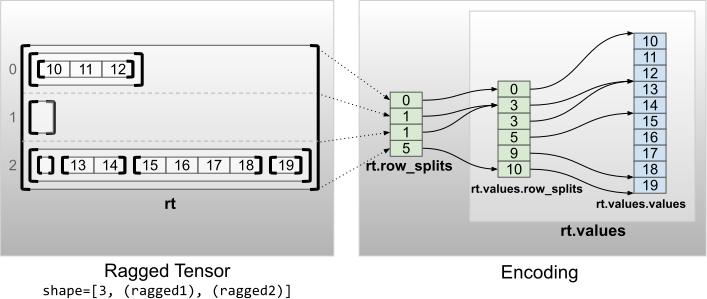

In [83]:
rt = tf.RaggedTensor.from_row_splits(
    values=tf.RaggedTensor.from_row_splits(
        values=[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        row_splits=[0, 3, 3, 5, 9, 10]),
    row_splits=[0, 1, 1, 5])

print(rt)
print("Shape: {}".format(rt.shape))
print("Number of partitioned dimensions: {}".format(rt.ragged_rank))

<tf.RaggedTensor [[[10, 11, 12]], [], [[], [13, 14], [15, 16, 17, 18], [19]]]>
Shape: (3, None, None)
Number of partitioned dimensions: 2


* 팩토리 함수 `tf.RaggedTensor.from_nested_row_splits` : row_splits 텐서 목록을 제공하여 여러 비정형 차원을 가진 RaggedTensor를 직접 구성하는 데 사용할 수 있음

In [84]:
rt = tf.RaggedTensor.from_nested_row_splits(
    flat_values=[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
    nested_row_splits=([0, 1, 1, 5], [0, 3, 3, 5, 9, 10]))
print(rt)

<tf.RaggedTensor [[[10, 11, 12]], [], [[], [13, 14], [15, 16, 17, 18], [19]]]>


### 비정형 순위 및 평면 값

* 비정형 텐서의 비정형 순위 : 기본 values 텐서가 분할된 횟수 (가장 안쪽 텐서를 flat_values)

In [85]:
# shape = [batch, (paragraph), (sentence), (word)]
conversations = tf.ragged.constant(
    [[[["I", "like", "ragged", "tensors."]],
      [["Oh", "yeah?"], ["What", "can", "you", "use", "them", "for?"]],
      [["Processing", "variable", "length", "data!"]]],
     [[["I", "like", "cheese."], ["Do", "you?"]],
      [["Yes."], ["I", "do."]]]])
conversations.shape

TensorShape([2, None, None, None])

In [86]:
assert conversations.ragged_rank == len(conversations.nested_row_splits)
conversations.ragged_rank  # Number of partitioned dimensions.

3

In [87]:
conversations.flat_values.numpy()

array([b'I', b'like', b'ragged', b'tensors.', b'Oh', b'yeah?', b'What',
       b'can', b'you', b'use', b'them', b'for?', b'Processing',
       b'variable', b'length', b'data!', b'I', b'like', b'cheese.', b'Do',
       b'you?', b'Yes.', b'I', b'do.'], dtype=object)

### 정형한 내부 차원

내부 차원이 정형한 비정형 텐서는 values에 다차원 `tf.Tensor`를 사용하여 인코딩

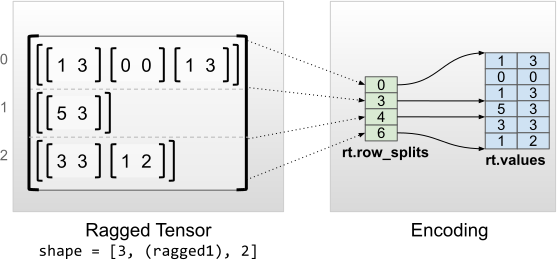

In [88]:
rt = tf.RaggedTensor.from_row_splits(
    values=[[1, 3], [0, 0], [1, 3], [5, 3], [3, 3], [1, 2]],
    row_splits=[0, 3, 4, 6])
print(rt)
print("Shape: {}".format(rt.shape))
print("Number of partitioned dimensions: {}".format(rt.ragged_rank))
print("Flat values shape: {}".format(rt.flat_values.shape))
print("Flat values:\n{}".format(rt.flat_values))

<tf.RaggedTensor [[[1, 3],
  [0, 0],
  [1, 3]], [[5, 3]], [[3, 3],
                      [1, 2]]]>
Shape: (3, None, 2)
Number of partitioned dimensions: 1
Flat values shape: (6, 2)
Flat values:
[[1 3]
 [0 0]
 [1 3]
 [5 3]
 [3 3]
 [1 2]]


### 균일한 비내부 차원

균일한 비내부 차원을 갖는 비정형 텐서는 `uniform_row_length`로 행을 분할하여 인코딩

In [89]:
rt = tf.RaggedTensor.from_uniform_row_length(
    values=tf.RaggedTensor.from_row_splits(
        values=[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        row_splits=[0, 3, 5, 9, 10]),
    uniform_row_length=2)
print(rt)
print("Shape: {}".format(rt.shape))
print("Number of partitioned dimensions: {}".format(rt.ragged_rank))

<tf.RaggedTensor [[[10, 11, 12], [13, 14]],
 [[15, 16, 17, 18], [19]]]>
Shape: (2, 2, None)
Number of partitioned dimensions: 2
